**PREPROCESSING DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [36]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [37]:
# Membaca data dari file Excel
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/333/dataset-uji-prediksi.xlsx')
df.head()

,Username,Text
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si..."
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...


In [38]:
#Case Folding
df['case_folding'] = df['Text'].str.lower()
df.head()

,Username,Text,case_folding
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si..."
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...


In [40]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Fungsi untuk menghapus username Twitter
def remove_twitter_username(text):
    # Pola regex untuk mendeteksi username Twitter
    username_pattern = re.compile(r'@[\w_]+')

    # Mengganti username dengan string kosong
    text_without_username = re.sub(username_pattern, '', text)

    return text_without_username

# Fungsi untuk menghilangkan hashtag
def remove_hashtags(text):
    # Pola regex untuk mendeteksi hashtag
    hashtag_pattern = re.compile(r'#\w+')

    # Mengganti hashtag dengan string kosong
    text_without_hashtags = re.sub(hashtag_pattern, '', text)

    return text_without_hashtags

# Tahap cleaning text
def remove_punct(Text):
    # Menghapus username Twitter
    Text = remove_twitter_username(Text)

    # menghilangkan alfabet "n" yang tidak sinkron diawal kata.
    Text = re.sub(r'\b(n)([^a-zA-Z])', r'\2', Text)
    # Menghapus karakter baris baru
    Text = re.sub(r'\n', '', Text)
    # Menghapus URL atau tautan web
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)
    # Menghapus karakter tanda kutip ganda
    Text = re.sub('&quot;'," ", Text)
    # Menghapus angka-angka
    Text = re.sub(r"\d+", " ", str(Text))
    # Menghapus kata-kata yang hanya terdiri dari satu huruf
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))
    # Menghapus karakter non-alphanumerik dan non-spasi
    Text = re.sub(r"[^\w\s]", " ", str(Text))
    # Menggabungkan dua atau lebih kemunculan karakter berurutan yang sama menjadi dua kemunculan
    Text = re.sub(r'(.)\1+', r'\1\1', Text)
    # Mengganti dua atau lebih spasi berturut-turut dengan satu spasi
    Text = re.sub(r"\s+", " ", str(Text))
    # Menghapus karakter hastag
    Text = re.sub(r'#', '', Text)
    # Menghapus karakter selain huruf-huruf alfanumerik
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))
    # Menghapus kata-kata yang terdiri dari satu atau dua karakter
    Text = re.sub(r'\b\w{1,2}\b', '', Text)
    # Mengganti dua atau lebih spasi berturut-turut dengan satu spasi
    Text = re.sub(r'\s\s+', ' ', Text)

    return Text

# Menghilangkan hashtag setelah membersihkan teks
df['cleaning'] = df['case_folding'].apply(lambda x: remove_hashtags(remove_punct(x)))
df.head(20)


,Username,Text,case_folding,cleaning
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...
5,indriankoto,b'digunakan bersamaan tidak bisakah kak? denga...,b'digunakan bersamaan tidak bisakah kak? denga...,digunakan bersamaan tidak bisakah kak dengan ...
6,kprtzigfftbxx,b'@kemkominfo Jangan tambahin daerah yang kena...,b'@kemkominfo jangan tambahin daerah yang kena...,jangan tambahin daerah yang kena peralihan an...
7,threepointt3,b'Beban banget mau nonton doang kudu beli STB\...,b'beban banget mau nonton doang kudu beli stb\...,beban banget mau nonton doang kudu beli stb k...
8,Sintia14614,b'bingung sekarang mau nonton tv harus beli ST...,b'bingung sekarang mau nonton tv harus beli st...,bingung sekarang mau nonton harus beli stb du...
9,hani52577050,"b'Teruntuk pak @jokowi , tv digital ini menyus...","b'teruntuk pak @jokowi , tv digital ini menyus...",teruntuk pak digital ini menyusahkan sekali p...


In [41]:
# Tokenization
def tokenization(text):
    text = re.split(r'\W+', text.lower())
    return text

df['tokenisasi'] = df['cleaning'].apply(lambda x: tokenization(x))
df.head()

,Username,Text,case_folding,cleaning,tokenisasi
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"[, yang, menolak, analog, sini, lah, adu, argu..."
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"[, pagii, well, starting, warga, jatim, siap, ..."
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"[, masa, gue, gada, channel, sctv, padahal, gu..."
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"[, setelah, berakhirnya, fifa, world, cup, qat..."
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"[, buat, apaan, coba, analog, hapuskan, heran,..."


In [42]:
# Slang Word
kamus_slangword = pd.read_csv('/content/drive/MyDrive/slangwords.csv')
kata_normalisasi_dict = {}

for index, row in kamus_slangword.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

df['konversi_slang'] = df['tokenisasi'].apply(lambda x: normalisasi_kata(x))
df.head(10)


,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"[, yang, menolak, analog, sini, lah, adu, argu...","[, yang, menolak, analog, sini, lah, adu, argu..."
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"[, pagii, well, starting, warga, jatim, siap, ...","[, pagii, well, starting, warga, jatim, siap, ..."
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"[, masa, gue, gada, channel, sctv, padahal, gu...","[, masa, saya, enggak ada, channel, sctv, pada..."
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"[, setelah, berakhirnya, fifa, world, cup, qat...","[, setelah, berakhirnya, fifa, world, cup, qat..."
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"[, buat, apaan, coba, analog, hapuskan, heran,...","[, buat, apaan, coba, analog, hapuskan, heran,..."
5,indriankoto,b'digunakan bersamaan tidak bisakah kak? denga...,b'digunakan bersamaan tidak bisakah kak? denga...,digunakan bersamaan tidak bisakah kak dengan ...,"[, digunakan, bersamaan, tidak, bisakah, kak, ...","[, digunakan, bersamaan, tidak, bisakah, kak, ..."
6,kprtzigfftbxx,b'@kemkominfo Jangan tambahin daerah yang kena...,b'@kemkominfo jangan tambahin daerah yang kena...,jangan tambahin daerah yang kena peralihan an...,"[, jangan, tambahin, daerah, yang, kena, peral...","[, jangan, tambahkan, daerah, yang, kena, pera..."
7,threepointt3,b'Beban banget mau nonton doang kudu beli STB\...,b'beban banget mau nonton doang kudu beli stb\...,beban banget mau nonton doang kudu beli stb k...,"[, beban, banget, mau, nonton, doang, kudu, be...","[, beban, banget, mau, menonton, saja, harus, ..."
8,Sintia14614,b'bingung sekarang mau nonton tv harus beli ST...,b'bingung sekarang mau nonton tv harus beli st...,bingung sekarang mau nonton harus beli stb du...,"[, bingung, sekarang, mau, nonton, harus, beli...","[, bingung, sekarang, mau, menonton, harus, be..."
9,hani52577050,"b'Teruntuk pak @jokowi , tv digital ini menyus...","b'teruntuk pak @jokowi , tv digital ini menyus...",teruntuk pak digital ini menyusahkan sekali p...,"[, teruntuk, pak, digital, ini, menyusahkan, s...","[, teruntuk, bapak, digital, ini, menyusahkan,..."


In [43]:
#stopwordremoval
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Daftar stopword bahasa Indonesia
stopword = nltk.corpus.stopwords.words('indonesian')

# Tambahkan kata-kata ke daftar stopword
additional_stopwords = ["lama", "tidak", "platejohnny", "xad", "xba", "johnny", "johnny plate", "amp",
                        "xbb", "dvb", "xbc", "xbd", "xaa","xab", "bombunuhdiri", "lordranggameninggal", "andikceritanya",
                        "daftarslotonline","kegblgnunfaedh", "mhz"]  # Ganti kata1, kata2, kata3 dengan kata-kata tambahan yang ingin Anda masukkan

stopword.extend(additional_stopwords)

# Fungsi untuk menghapus stopword, termasuk yang telah ditambahkan
def remove_stopwords(Text):
    Text = [word for word in Text if word not in stopword]
    return Text

# Contoh penggunaan
df['stopword_removal'] = df['konversi_slang'].apply(lambda x: remove_stopwords(x))
df.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang,stopword_removal
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"[, yang, menolak, analog, sini, lah, adu, argu...","[, yang, menolak, analog, sini, lah, adu, argu...","[, menolak, analog, adu, argumen, pakai, digit..."
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"[, pagii, well, starting, warga, jatim, siap, ...","[, pagii, well, starting, warga, jatim, siap, ...","[, pagii, well, starting, warga, jatim, berali..."
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"[, masa, gue, gada, channel, sctv, padahal, gu...","[, masa, saya, enggak ada, channel, sctv, pada...","[, enggak ada, channel, sctv, digital, menonto..."
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"[, setelah, berakhirnya, fifa, world, cup, qat...","[, setelah, berakhirnya, fifa, world, cup, qat...","[, fifa, world, cup, qatar, dukung, timnasday,..."
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"[, buat, apaan, coba, analog, hapuskan, heran,...","[, buat, apaan, coba, analog, hapuskan, heran,...","[, coba, analog, hapuskan, heran, banget, akut..."
5,indriankoto,b'digunakan bersamaan tidak bisakah kak? denga...,b'digunakan bersamaan tidak bisakah kak? denga...,digunakan bersamaan tidak bisakah kak dengan ...,"[, digunakan, bersamaan, tidak, bisakah, kak, ...","[, digunakan, bersamaan, tidak, bisakah, kak, ...","[, bersamaan, kak, membunuh, siaran, analog, ]"
6,kprtzigfftbxx,b'@kemkominfo Jangan tambahin daerah yang kena...,b'@kemkominfo jangan tambahin daerah yang kena...,jangan tambahin daerah yang kena peralihan an...,"[, jangan, tambahin, daerah, yang, kena, peral...","[, jangan, tambahkan, daerah, yang, kena, pera...","[, tambahkan, daerah, kena, peralihan, analog, ]"
7,threepointt3,b'Beban banget mau nonton doang kudu beli STB\...,b'beban banget mau nonton doang kudu beli stb\...,beban banget mau nonton doang kudu beli stb k...,"[, beban, banget, mau, nonton, doang, kudu, be...","[, beban, banget, mau, menonton, saja, harus, ...","[, beban, banget, menonton, beli, stb, kembali..."
8,Sintia14614,b'bingung sekarang mau nonton tv harus beli ST...,b'bingung sekarang mau nonton tv harus beli st...,bingung sekarang mau nonton harus beli stb du...,"[, bingung, sekarang, mau, nonton, harus, beli...","[, bingung, sekarang, mau, menonton, harus, be...","[, bingung, menonton, beli, stb, menonton, men..."
9,hani52577050,"b'Teruntuk pak @jokowi , tv digital ini menyus...","b'teruntuk pak @jokowi , tv digital ini menyus...",teruntuk pak digital ini menyusahkan sekali p...,"[, teruntuk, pak, digital, ini, menyusahkan, s...","[, teruntuk, bapak, digital, ini, menyusahkan,...","[, teruntuk, digital, menyusahkan, anak, menan..."


In [44]:
#mengubah dari bentuk token menjadi bentuk kalimat kembali
Konvesi_slang = df[['stopword_removal']]

def fit_stopwords(Text):
    Text = np.array(Text)
    Text = ' '.join(Text)

    return Text

df['stopword_removal'] = df['stopword_removal'].apply(lambda x: fit_stopwords(x))
df

,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang,stopword_removal
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"[, yang, menolak, analog, sini, lah, adu, argu...","[, yang, menolak, analog, sini, lah, adu, argu...",menolak analog adu argumen pakai digital sena...
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"[, pagii, well, starting, warga, jatim, siap, ...","[, pagii, well, starting, warga, jatim, siap, ...",pagii well starting warga jatim beralih digit...
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"[, masa, gue, gada, channel, sctv, padahal, gu...","[, masa, saya, enggak ada, channel, sctv, pada...",enggak ada channel sctv digital menonton kons...
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"[, setelah, berakhirnya, fifa, world, cup, qat...","[, setelah, berakhirnya, fifa, world, cup, qat...",fifa world cup qatar dukung timnasday piala a...
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"[, buat, apaan, coba, analog, hapuskan, heran,...","[, buat, apaan, coba, analog, hapuskan, heran,...",coba analog hapuskan heran banget akutuh mend...
...,...,...,...,...,...,...,...
9592,KinKin_20,b'@indomyfess Nasibku yg gak punya TV digital\...,b'@indomyfess nasibku yg gak punya tv digital\...,nasibku gak punya digital xad xad kenapa pili...,"[, nasibku, gak, punya, digital, xad, xad, ken...","[, nasibku, enggak, punya, digital, xad, xad, ...",nasibku digital pilih kasih sih besok tolong ...
9593,midasbuy_id,b'Trending #KembalikanTVAnalog ternyata Curhat...,b'trending #kembalikantvanalog ternyata curhat...,trending kembalikantvanalog ternyata curhatan...,"[, trending, kembalikantvanalog, ternyata, cur...","[, trending, kembalikan tv analog, ternyata, c...",trending kembalikan tv analog curhatan masyar...
9594,RusaLiarT,"b'@SantuyMax @indosupporter Gaada bang, cuma d...","b'@santuymax @indosupporter gaada bang, cuma d...",gaada bang cuma channel analog doang ini,"[, gaada, bang, cuma, channel, analog, doang, ...","[, enggak ada, abang, hanya, channel, analog, ...",enggak ada abang channel analog
9595,MamieKoe,"b'Nah ini kelebihan lain TV digital, bidang pa...","b'nah ini kelebihan lain tv digital, bidang pa...",nah ini kelebihan lain digital bidang pandang...,"[, nah, ini, kelebihan, lain, digital, bidang,...","[, nah, ini, kelebihan, lain, digital, bidang,...",kelebihan digital bidang pandang luas stb col...


In [46]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['stemming'] = df['stopword_removal'].apply(lambda x: stemming(x))
df.head()

,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang,stopword_removal,stemming
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"[, yang, menolak, analog, sini, lah, adu, argu...","[, yang, menolak, analog, sini, lah, adu, argu...",menolak analog adu argumen pakai digital sena...,tolak analog adu argumen pakai digital senang ...
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"[, pagii, well, starting, warga, jatim, siap, ...","[, pagii, well, starting, warga, jatim, siap, ...",pagii well starting warga jatim beralih digit...,pagi well starting warga jatim alih digital st...
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"[, masa, gue, gada, channel, sctv, padahal, gu...","[, masa, saya, enggak ada, channel, sctv, pada...",enggak ada channel sctv digital menonton kons...,enggak ada channel sctv digital tonton konser ...
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"[, setelah, berakhirnya, fifa, world, cup, qat...","[, setelah, berakhirnya, fifa, world, cup, qat...",fifa world cup qatar dukung timnasday piala a...,fifa world cup qatar dukung timnasday piala af...
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"[, buat, apaan, coba, analog, hapuskan, heran,...","[, buat, apaan, coba, analog, hapuskan, heran,...",coba analog hapuskan heran banget akutuh mend...,coba analog hapus heran banget akutuh mendingt...


In [47]:
#Save Hasil Preprocessing
df.to_csv('/content/drive/MyDrive/333/preprocessing-dataset-uji-prediksi.csv',encoding='utf8', index=False)

**MODEL BILSTM**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_excel('/content/drive/MyDrive/333/data_preprocessing_datawal333.xlsx')

In [13]:
data.columns

Index(['Username', 'Text', 'case_folding', 'cleaning', 'tokenisasi',
       'konversi_slang', 'stopword_removal', 'stemming', 'Labels'],
      dtype='object')

In [14]:
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['stemming'].values)

In [15]:
data.head()

,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang,stopword_removal,stemming,Labels
0,ikaa0069,b'@jokowi Pemerintah selalu bisa mengatasi mas...,b'@jokowi pemerintah selalu bisa mengatasi mas...,pemerintah selalu bisa mengatasi masalah dalam...,"['', 'pemerintah', 'selalu', 'bisa', 'mengatas...","['', 'pemerintah', 'selalu', 'bisa', 'mengatas...",pemerintah mengatasi negeri percayakan analog ...,perintah atas negeri percaya analog nonaktif,Netral
1,FaishalIshal5,b'@historyofpersib dimana mana ge tipadan TV d...,b'@historyofpersib dimana mana ge tipadan tv d...,dimana mana tipadan digital taikucing mah mend...,"['', 'dimana', 'mana', 'tipadan', 'digital', '...","['', 'dimana', 'mana', 'tipadan', 'digital', '...",dimana tipadan digital taikucing mah mendingtv...,mana tipadan digital taikucing mah mendingtvan...,Negatif
2,arepkepiye,b'@AriefSyuhada_ @ReceinAja @pagipagiambyar ki...,b'@ariefsyuhada_ @receinaja @pagipagiambyar ki...,kita disuruh pindah pake digital tontonan kek tai,"['', 'kita', 'disuruh', 'pindah', 'pake', 'dig...","['', 'kita', 'disuruh', 'pindah', 'pakai', 'di...",disuruh pindah pakai digital tontonan kayak tahi,suruh pindah pakai digital tonton kayak tahi,Negatif
3,khassandrahh,b'Kangen TV analog gue nih\n#MendingTVAnalog\s...,b'kangen tv analog gue nih\n#mendingtvanalog\s...,kangen analog gue nih mendingtvanalog stb maha...,"['', 'kangen', 'analog', 'gue', 'nih', 'mendin...","['', 'kangen', 'analog', 'saya', 'ini', 'mendi...",kangen analog mendingtvanalog stb mahal hibura...,kangen analog mendingtvanalog stb mahal hibur ...,Negatif
4,Bimo_o_o,b'#JogjaNews | Suntik Mati TV Analog Kembali D...,b'#jogjanews | suntik mati tv analog kembali d...,jogjanews suntik mati analog kembali dilakukan...,"['', 'jogjanews', 'suntik', 'mati', 'analog', ...","['', 'jogja news', 'suntik', 'mati', 'analog',...",jogja news suntik mati analog daftar wilayahny...,jogja news suntik mati analog daftar wilayah t...,Netral


In [16]:
X = tokenizer.texts_to_sequences(data['stemming'].values)
X = pad_sequences(X)

le = LabelEncoder()
Y = le.fit_transform(data['Labels'].values)

In [17]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  35, 850, 460, 633,   2, 413], dtype=int32)

In [18]:
np.shape(X)

(3098, 37)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2478, 37) (620, 37) (2478,) (620,)


In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2478, 37) (2478,)
(620, 37) (620,)


In [59]:
X.shape[1]

37

In [60]:
# Mendapatkan nilai maxlen
maxlen = tokenizer.num_words
print("Nilai maxlen:", maxlen)

Nilai maxlen: 10000


In [22]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
adam = Adam(learning_rate=0.001)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=adam,
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 64)            640000    
                                                                 
 bidirectional (Bidirection  (None, 37, 128)           66048     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [23]:
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
losses = []
accuracies = []
confusion_matrices = []
classification_reports = []

In [24]:
for train_index, val_index in kfold.split(X_train, y_train):
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10) , callbacks=[early_stopping]
  model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=16, validation_data=(X_val_fold, y_val_fold))

  # Evaluasi model pada data validasi
  loss, accuracy = model.evaluate(X_val_fold, y_val_fold)
  losses.append(loss)
  accuracies.append(accuracy)


  # Prediksi pada data validasi
  print ('Hasil Pelatihan fold yang ke:',train_index )
  y_pred = model.predict(X_val_fold)
  y_pred = np.argmax(y_pred, axis=-1)  # Memilih indeks kelas dengan probabilitas tertinggi

  # Mencetak matriks kebingungan dan laporan klasifikasi
  confusion = confusion_matrix(y_val_fold, y_pred)
  confusion_matrices.append(confusion)
  report = classification_report(y_val_fold, y_pred)
  classification_reports.append(report)

Epoch 1/10
140/140 [==============================] - 28s 103ms/step - loss: 0.8282 - accuracy: 0.6422 - val_loss: 0.7154 - val_accuracy: 0.7460
Epoch 2/10
140/140 [==============================] - 6s 41ms/step - loss: 0.6159 - accuracy: 0.7507 - val_loss: 0.6515 - val_accuracy: 0.7379
Epoch 3/10
140/140 [==============================] - 5s 32ms/step - loss: 0.4766 - accuracy: 0.8305 - val_loss: 0.7639 - val_accuracy: 0.7137
Epoch 4/10
140/140 [==============================] - 2s 17ms/step - loss: 0.3315 - accuracy: 0.9022 - val_loss: 0.9164 - val_accuracy: 0.6694
Epoch 5/10
140/140 [==============================] - 2s 14ms/step - loss: 0.2534 - accuracy: 0.9229 - val_loss: 0.9496 - val_accuracy: 0.6774
Epoch 6/10
140/140 [==============================] - 2s 14ms/step - loss: 0.1926 - accuracy: 0.9498 - val_loss: 1.0085 - val_accuracy: 0.7097
Epoch 7/10
140/140 [==============================] - 2s 17ms/step - loss: 0.1516 - accuracy: 0.9610 - val_loss: 1.0629 - val_accuracy: 0.68

In [27]:
# Save the model
model.save("/content/drive/MyDrive/333/sentiment_model.h5")

# Save the Tokenizer
with open("/content/drive/MyDrive/333/sentiment_tokenizer.pkl", "wb") as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [25]:
# Menampilkan hasil Cross-Validation
for fold in range(n_splits):
    print(f"Fold {fold + 1}:")
    print(f"Loss: {losses[fold]}, Accuracy: {accuracies[fold]}")
    print("Confusion Matrix:")
    print(confusion_matrices[fold])
    print("Classification report:")
    print(classification_reports[fold])
    print()

# Menampilkan rata-rata hasil Cross-Validation
print("Rata-rata hasil Cross-Validation:")
print(f"Rata-rata Loss: {np.mean(losses)}, Rata-rata Accuracy: {np.mean(accuracies)}")

Fold 1:
Loss: 1.2643332481384277, Accuracy: 0.6774193644523621
Confusion Matrix:
[[107  16  12]
 [ 13  16  14]
 [ 13  12  45]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       135
           1       0.36      0.37      0.37        43
           2       0.63      0.64      0.64        70

    accuracy                           0.68       248
   macro avg       0.60      0.60      0.60       248
weighted avg       0.68      0.68      0.68       248


Fold 2:
Loss: 0.16435807943344116, Accuracy: 0.9354838728904724
Confusion Matrix:
[[130   5   1]
 [  4  38   1]
 [  1   4  64]]
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.81      0.88      0.84        43
           2       0.97      0.93      0.95        69

    accuracy                           0.94       248
   macro avg       0.91      0.92      0.92  

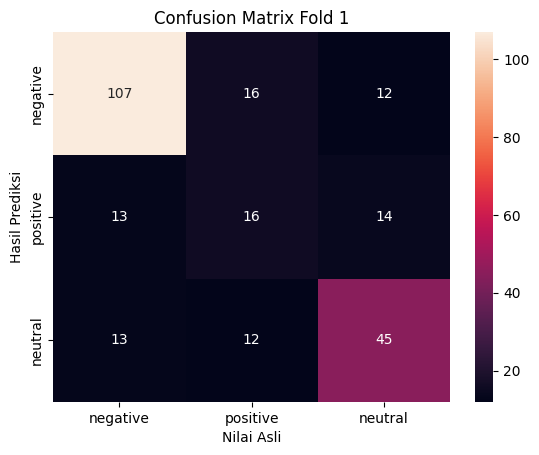

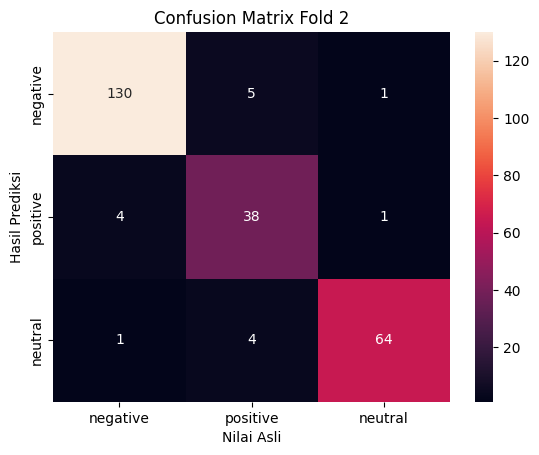

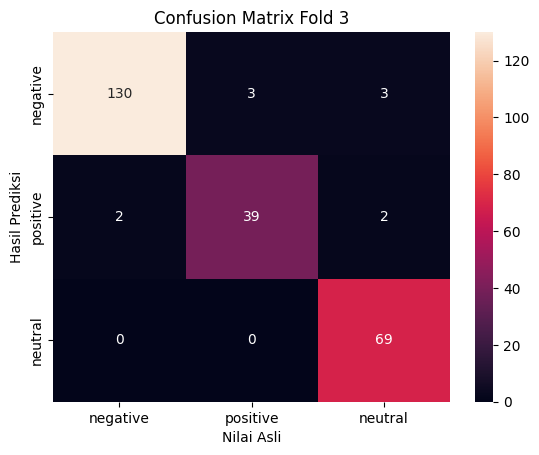

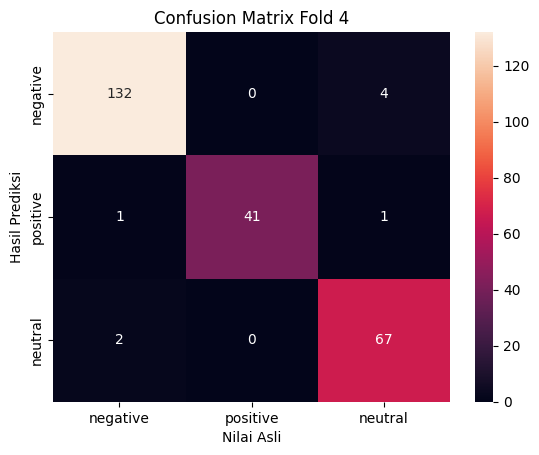

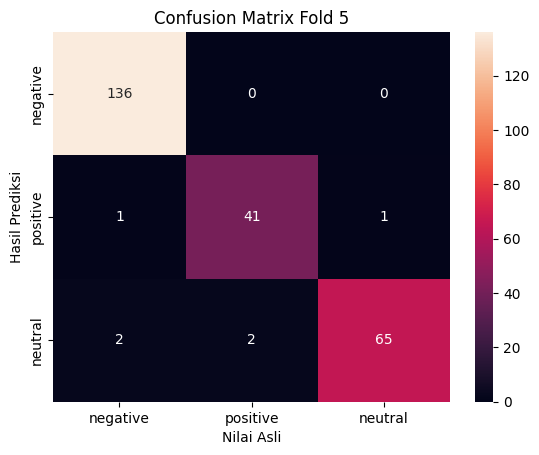

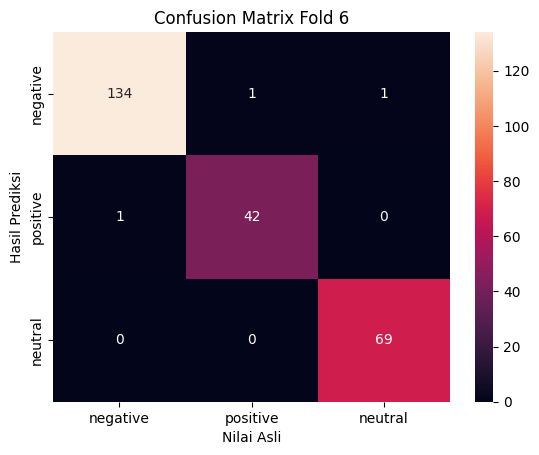

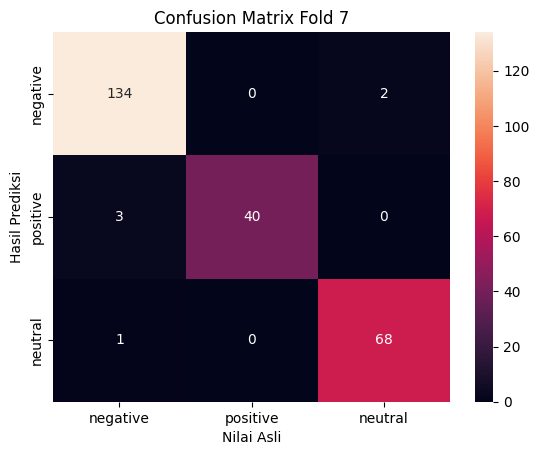

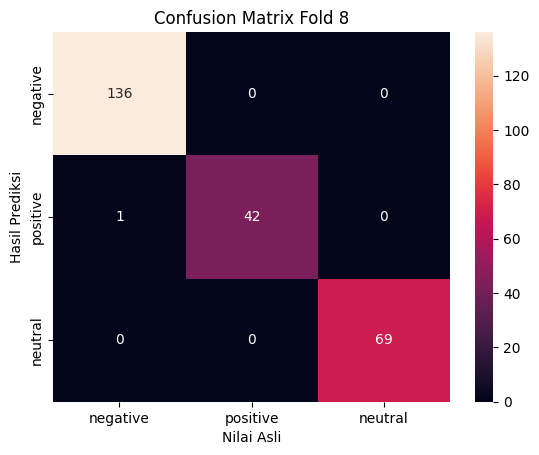

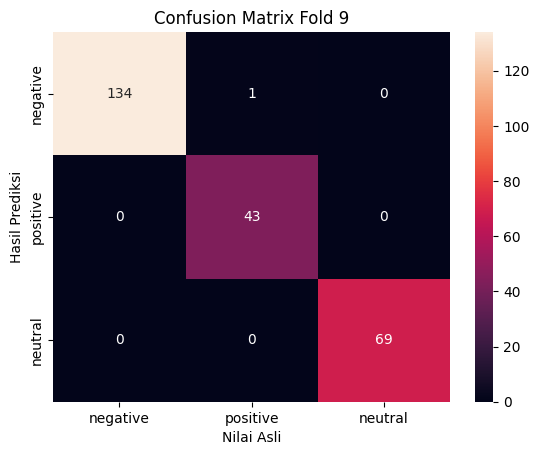

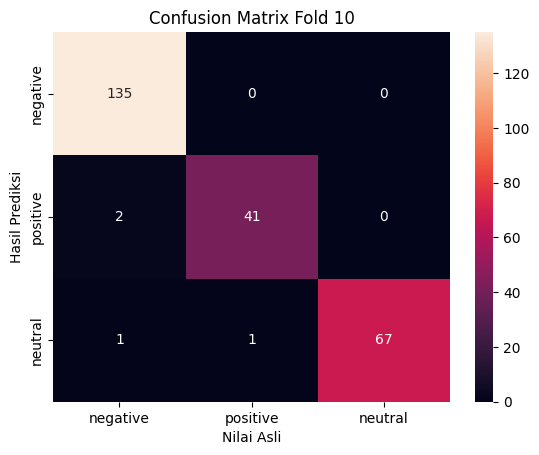

In [28]:
data_labels = ["negative", "positive", "neutral"]

for i, confusion_matrix in enumerate(confusion_matrices):
    canv = pd.DataFrame(confusion_matrix, index=data_labels, columns=data_labels)
    plt.figure()
    sns.heatmap(canv, annot=True, fmt="d")
    plt.title(f"Confusion Matrix Fold {i+1}")
    plt.xlabel("Nilai Asli")
    plt.ylabel("Hasil Prediksi")
    plt.show()

In [33]:
# reviews on which we need to predict
sentence = ["Kominfo telah mematikan sinyal TV analog di wilayah Bandung, Yogyakarta, Surakarta, Semarang, Surabaya, dan Batam mulai hari Sabtu "]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, maxlen=X.shape[1], dtype='int32', value=0)
prediction = model.predict(padded)[0]

if (np.argmax(prediction) == 0):
  print("Negative")
elif (np.argmax(prediction) == 1):
  print("Positive")
else:
  print("Neutral")

1/1 [==============================] - 0s 37ms/step
Positive


In [51]:
import pandas as pd

# Baca data dari file Excel yang berisi kalimat yang ingin diprediksi
data_prediksi = pd.read_excel('/content/drive/MyDrive/333/preprocessing-dataset-uji-prediksi.xlsx')  # Ganti 'file_data_prediksi.xlsx' dengan nama file Anda

# Ambil kolom atau atribut yang berisi kalimat yang ingin diprediksi
kalimat_prediksi = data_prediksi['stemming'].tolist()

# Tokenisasi dan padding pada kalimat yang ingin diprediksi
sequences = tokenizer.texts_to_sequences(kalimat_prediksi)
padded = pad_sequences(sequences, maxlen=X.shape[1], dtype='int32', value=0)

# Melakukan prediksi sentimen untuk kalimat yang ingin diprediksi
prediksi = model.predict(padded)

# Konversi hasil prediksi menjadi label sentimen
label_sentimen = ["Negatif", "Positif", "Netral"]
label_hasil = [label_sentimen[np.argmax(p)] for p in prediksi]

# Tambahkan label hasil prediksi ke dalam DataFrame data_prediksi
data_prediksi['Hasil_Prediksi'] = label_hasil

# Simpan DataFrame ke dalam file Excel
data_prediksi.to_excel('/content/drive/MyDrive/333/hasil-prediksi-preprocessing-dataset-uji-prediksi.xlsx', index=False)

# print(data_prediksi)
horizontal_df = data_prediksi.to_dict(orient='records')
pd.DataFrame(horizontal_df)

300/300 [==============================] - 2s 6ms/step


,Username,Text,case_folding,cleaning,tokenisasi,konversi_slang,stopword_removal,stemming,Hasil_Prediksi
0,baperanloezz,b'Yang menolak tv analog sini lah adu argumen ...,b'yang menolak tv analog sini lah adu argumen ...,yang menolak analog sini lah adu argumen sama...,"['', 'yang', 'menolak', 'analog', 'sini', 'lah...","['', 'yang', 'menolak', 'analog', 'sini', 'lah...",menolak analog adu argumen pakai digital sena...,tolak analog adu argumen pakai digital senang ...,Negatif
1,widisaja89,"b'Pagiii... Well, starting 2023 warga JATIM si...","b'pagiii... well, starting 2023 warga jatim si...",pagii well starting warga jatim siap beralih ...,"['', 'pagii', 'well', 'starting', 'warga', 'ja...","['', 'pagii', 'well', 'starting', 'warga', 'ja...",pagii well starting warga jatim beralih digit...,pagi well starting warga jatim alih digital st...,Netral
2,TAEKO0KERS,b'masa gue gada channel sctv padahal tv gue ud...,b'masa gue gada channel sctv padahal tv gue ud...,masa gue gada channel sctv padahal gue udah d...,"['', 'masa', 'gue', 'gada', 'channel', 'sctv',...","['', 'masa', 'saya', 'enggak ada', 'channel', ...",enggak ada channel sctv digital menonton kons...,enggak ada channel sctv digital tonton konser ...,Netral
3,jiahaljafara,b'Setelah berakhirnya FIFA World Cup Qatar 202...,b'setelah berakhirnya fifa world cup qatar 202...,setelah berakhirnya fifa world cup qatar lanj...,"['', 'setelah', 'berakhirnya', 'fifa', 'world'...","['', 'setelah', 'berakhirnya', 'fifa', 'world'...",fifa world cup qatar dukung timnasday piala a...,fifa world cup qatar dukung timnasday piala af...,Netral
4,keylilan12,b'buat apaan coba ya tv analog di hapuskan her...,b'buat apaan coba ya tv analog di hapuskan her...,buat apaan coba analog hapuskan heran bgt aku...,"['', 'buat', 'apaan', 'coba', 'analog', 'hapus...","['', 'buat', 'apaan', 'coba', 'analog', 'hapus...",coba analog hapuskan heran banget akutuh mend...,coba analog hapus heran banget akutuh mendingt...,Positif
...,...,...,...,...,...,...,...,...,...
9592,KinKin_20,b'@indomyfess Nasibku yg gak punya TV digital\...,b'@indomyfess nasibku yg gak punya tv digital\...,nasibku gak punya digital xad xad kenapa pili...,"['', 'nasibku', 'gak', 'punya', 'digital', 'xa...","['', 'nasibku', 'enggak', 'punya', 'digital', ...",nasibku digital pilih kasih sih besok tolong ...,nasib digital pilih kasih sih besok tolong aks...,Negatif
9593,midasbuy_id,b'Trending #KembalikanTVAnalog ternyata Curhat...,b'trending #kembalikantvanalog ternyata curhat...,trending kembalikantvanalog ternyata curhatan...,"['', 'trending', 'kembalikantvanalog', 'ternya...","['', 'trending', 'kembalikan tv analog', 'tern...",trending kembalikan tv analog curhatan masyar...,trending kembali tv analog curhatan masyarakat...,Negatif
9594,RusaLiarT,"b'@SantuyMax @indosupporter Gaada bang, cuma d...","b'@santuymax @indosupporter gaada bang, cuma d...",gaada bang cuma channel analog doang ini,"['', 'gaada', 'bang', 'cuma', 'channel', 'anal...","['', 'enggak ada', 'abang', 'hanya', 'channel'...",enggak ada abang channel analog,enggak ada abang channel analog,Netral
9595,MamieKoe,"b'Nah ini kelebihan lain TV digital, bidang pa...","b'nah ini kelebihan lain tv digital, bidang pa...",nah ini kelebihan lain digital bidang pandang...,"['', 'nah', 'ini', 'kelebihan', 'lain', 'digit...","['', 'nah', 'ini', 'kelebihan', 'lain', 'digit...",kelebihan digital bidang pandang luas stb col...,lebih digital bidang pandang luas stb colok pakai,Netral


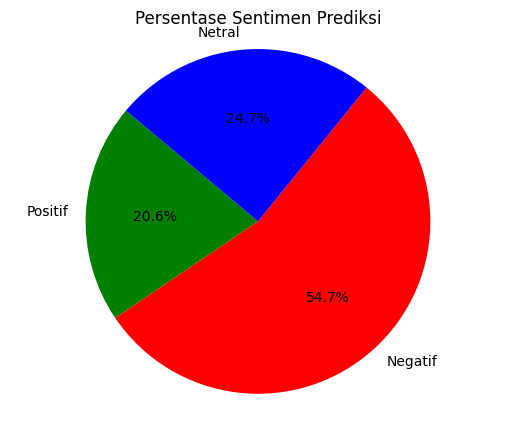

In [57]:
import matplotlib.pyplot as plt

# Hitung jumlah hasil prediksi untuk setiap label sentimen
count_sentimen = data_prediksi['Hasil_Prediksi'].value_counts()

# Hitung total jumlah hasil prediksi
total_prediksi = len(data_prediksi)

# Hitung persentase masing-masing label sentimen
persentase_positif = (count_sentimen.get("Positif", 0) / total_prediksi) * 100
persentase_negatif = (count_sentimen.get("Negatif", 0) / total_prediksi) * 100
persentase_netral = (count_sentimen.get("Netral", 0) / total_prediksi) * 100

# Data untuk grafik
labels = ['Positif', 'Negatif', 'Netral']
sizes = [persentase_positif, persentase_negatif, persentase_netral]
colors = ['green', 'red', 'blue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar pie chart menjadi lingkaran

# Tambahkan judul dengan font Times New Roman size 12
plt.title('Persentase Sentimen Prediksi')

# Atur jarak antara judul dan grafik
plt.subplots_adjust(top=0.9)

# Tampilkan grafik
plt.show()


In [58]:
print("Jumlah Data Sentimen Positif:", count_sentimen.get("Positif", 0))
print("Jumlah Data Sentimen Negatif:", count_sentimen.get("Negatif", 0))
print("Jumlah Data Sentimen Netral:", count_sentimen.get("Netral", 0))


Jumlah Data Sentimen Positif: 1975
Jumlah Data Sentimen Negatif: 5248
Jumlah Data Sentimen Netral: 2374
